# Note: The package you may need to do this lab is **scipy.stats**

###Task 1 - Binomial Distribution (hint: use binom)

60 percent of a large software company’s customers use the latest version of its operating system.  If a random sample of 25 customers are selected for a telephone survey, write a code (use binomial distribution) to calculate the probability that:



*   exactly 8 customers who uses the latest version is selected
*   more than 6 customers who uses the latest version are selected
*   atmost 12 customers who uses the old version are selected
* plot a binomial distrution of number of customers using latest version of operating system







# Zaur Gouliev Lab 3:
## Please note all figures rounded up to 4

In [47]:
#Import libraries
import scipy.stats as sc
from scipy.stats import binom, norm, poisson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import random as rd


#Using Binomial Distribution

n = 25
p = 0.6 #probability of selecting latest version of operating system

# For exacly 8 customers ( First Question is done for you)
print(" Probability of exactly 8 customers is:", round(sc.binom.pmf(8,n,p), 4))

 Probability of exactly 8 customers is: 0.0031


In [48]:
# For exacly 8 customers
n = 25
p = 0.6
k = 8

prob = binom.pmf(k, n, p)
print("The probability of exactly 8 customers using the latest version is:", round(prob, 4))

The probability of exactly 8 customers using the latest version is: 0.0031


In [49]:
# For more than 6 customers P(X>6) = 1 - P(X<=6)
n = 25
p = 0.6
k = 6

prob = 1 - binom.cdf(k, n, p)
print("The probability of more than 6 customers using the latest version is:", round(prob, 4))

The probability of more than 6 customers using the latest version is: 0.9997


In [50]:
# For atmost 12 customers
n = 25
p = 0.4
k = 12

prob = binom.cdf(k, n, p)
print("The probability of at most 12 customers using the old version is:", round(prob, 4))

The probability of at most 12 customers using the old version is: 0.8462


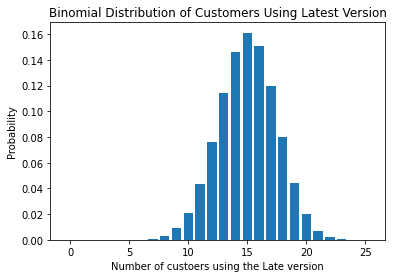

In [51]:
#Probability Distribution

n = 25
p = 0.6

k_values = np.arange(0, n+1)
probbilities = binom.pmf(k_values, n, p)

plt.bar(k_values, probbilities)
plt.xlabel('Number of custoers using the Late version')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Customers Using Latest Version')
plt.show()

###Task 2 - Normal Distribution (hint:use norm)

The length of time taken for queries to a mobile network company to be resolved is approximately normally distributed with a mean of 20 hours and a standard deviation of 5 hours.
Determine the proportion of queries which take:

* longer than 25 hours to resolve;

* less than 18 hours to resolve;

* between 15 and 30 hours.

* minimum number of hours within which 70% of queries are resolved.


In [52]:
# Using Normal Distribution ( Write you code here)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
mean = 20 # mean hours
sd = 5 # standard deviation
x = 25 #target

prob = 1 - norm.cdf(x, mean, sd)
print("The proportion of queries that take longer than 25 hours to resolve is:", round(prob, 4))

The proportion of queries that take longer than 25 hours to resolve is: 0.1587


In [53]:
mean = 20 # mean hours
sd = 5 # standard deviation
x = 18 # our target

prob = norm.cdf(x, mean, sd)
print("The proportion of queries that take less than 18 hours to resolve is:", round(prob, 4))

The proportion of queries that take less than 18 hours to resolve is: 0.3446


In [54]:
mean = 20
sd = 5
a = 15 # target range min
b = 30 # target range max

prob = norm.cdf(b, mean, sd) - norm.cdf(a, mean, sd)
print("The proportion of queries that take between 15 and 30 hours to resolve is:", round(prob, 4))

The proportion of queries that take between 15 and 30 hours to resolve is: 0.8186


In [60]:
# To find the minimum number of hours, we need to find the value of x such that the cumulative probability up to x is 0.7

mean = 20
sd = 5

x = norm.ppf(0.15, mean, sd) #P(X ≤ x) = 0.7

print("The minimum number of hours within which 70% of queries are resolved is:", round(x, 4))

The minimum number of hours within which 70% of queries are resolved is: 14.8178


### Task 3 - Poissan Distribution and Central Limit Theorem.

The rate of the number of calls to a customer service center is equal to 9 calls per minute.

* Generate and plot a histogram (count Vs distribution) of a posson distrbution of size 10,000 of the number of calls per minute. Compare this with the probability density plot (density Vs distribution).
* What is the probability of getting more than 16 calls per minute? Find the count(out of 10,000 instances) of getting more than 16 calls per minute.
* Show that the means of the samples (greater than 30) taken from this poisson distrbution is normally distributed (Center limit Theorem).

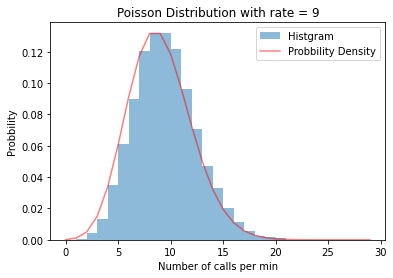

In [56]:
# Generate and plot poisson distribution. You can create additional code cells to display outputs

rate = 9
size = 10000

# generate poisson distribution
samples = np.random.poisson(rate, size)

# plot histogram
plt.hist(samples, bins=range(30), density=True, alpha=0.5, label='Histgram')

# plot probability density function
x = np.arange(0, 30)
pmf = poisson.pmf(x, rate)
plt.plot(x, pmf, 'r', alpha=0.5, label='Probbility Density')

plt.xlabel('Number of calls per min')
plt.ylabel('Probbility')
plt.title('Poisson Distribution with rate = 9')
plt.legend()
plt.show()

Poisson distribution has a low rate of 9 calls per minute, so the histogram and PMF are skewed to the right, indicating a low probability of many calls per mins

In [57]:
# Probability of getting more than 16 calls P(X>16) = 1 - P(X<=16)
rate = 9
size = 10000

# Poisson distribution
samples = np.random.poisson(rate, size)

# probability of getting more than 16 calls per minute
prob = 1 - poisson.cdf(16, rate)

# more than 16 calls per minute (counter)
count = np.sum(samples > 16)

print("Probability of getting more than 16 calls per minute:", round(prob, 4)) # rounding up to 4 decimal places
print("Count of getting more than 16 calls per minute:", count)

Probability of getting more than 16 calls per minute: 0.0111
Count of getting more than 16 calls per minute: 113


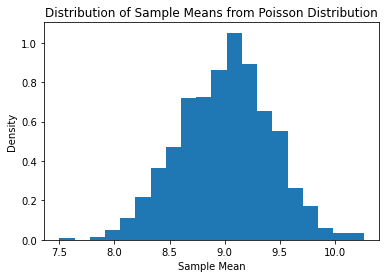

In [58]:
# take 1000 samples of size 50 from the Poisson distribution
sample_means = np.mean(np.random.poisson(rate, size=(1000, 50)), axis=1)

# plot histogram of sample means
plt.hist(sample_means, bins=20, density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means from Poisson Distribution')
plt.show()